/home/gerson/.miniconda3/envs/sklearn-env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on Test Data: 0.5849344890294972


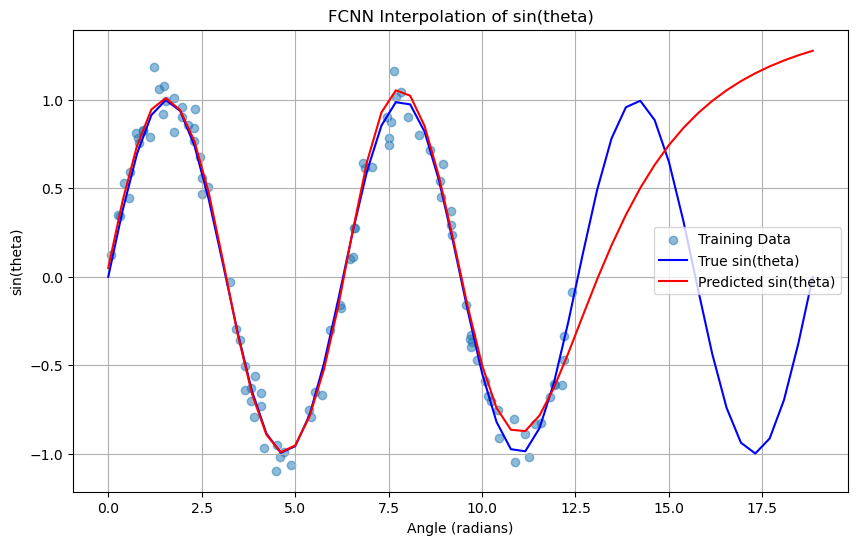

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# 1. Generate Training Data
np.random.seed(42)  # for reproducibility
num_samples = 100
angles_train = np.random.uniform(0, 4 * np.pi, num_samples).reshape(-1, 1)  # Reshape to (n_samples, n_features)
sin_values_train = np.sin(angles_train)

# Add some noise to the training data (optional, but can make it more realistic)
noise = np.random.normal(0, 0.1, sin_values_train.shape)
sin_values_train += noise

# 2. Define and Train the FCNN Model
# MLPRegressor expects input features to be 2D arrays (n_samples, n_features)
# For a simple angle input, n_features is 1

# Define the model
model = MLPRegressor(
    hidden_layer_sizes=(10,10,10),  # One hidden layer with 10 neurons
    activation='tanh',         # Rectified Linear Unit activation function
    solver='adam',             # Optimization algorithm
    max_iter=100000,             # Maximum number of iterations
    random_state=42,            # For reproducibility,
    learning_rate_init = 0.001,
    tol = 1e-8
)

# Train the model
model.fit(angles_train, sin_values_train)

# 3. Generate Test Data for Evaluation
num_test_samples = 50
angles_test = np.linspace(0, 6 * np.pi, num_test_samples).reshape(-1, 1)
sin_values_true = np.sin(angles_test)

# 4. Make Predictions
sin_values_predicted = model.predict(angles_test)

# 5. Evaluate the Model (Optional, but good practice)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(sin_values_true, sin_values_predicted)
print(f"Mean Squared Error on Test Data: {mse}")

# 6. Visualize the Results
plt.figure(figsize=(10, 6))
plt.scatter(angles_train, sin_values_train, label='Training Data', alpha=0.5)
plt.plot(angles_test, sin_values_true, label='True sin(theta)', color='blue')
plt.plot(angles_test, sin_values_predicted, label='Predicted sin(theta)', color='red')
plt.xlabel('Angle (radians)')
plt.ylabel('sin(theta)')
plt.title('FCNN Interpolation of sin(theta)')
plt.legend()
plt.grid(True)
plt.show()